# Stack Overflow Survey Data 2020

1.

## Data Load and Inspection
Text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
%matplotlib inline

df = pd.read_csv('data/2020.csv')
schema = pd.read_csv('data/2020_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  64461
Number of columns:  61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

There is no null values in the dataset.

In [4]:
df.shape

(64461, 61)

# Data Preprocessing

In [5]:
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [6]:
df['LanguageWorkedWith'].isnull().sum()

7083

In [7]:
new_df = df.dropna(how='any')

In [8]:
new_df['LanguageWorkedWith'].isnull().sum()

0

# Data Analysis
## Most languages worked with in 2020


In [9]:
lang_lists = new_df["LanguageWorkedWith"].str.split(';', expand=True)
lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
9,HTML/CSS,Java,JavaScript,Python,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
32,HTML/CSS,JavaScript,TypeScript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
41,Bash/Shell/PowerShell,C#,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None
46,Bash/Shell/PowerShell,C#,Java,JavaScript,Python,Ruby,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None
68,HTML/CSS,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Text(0, 0.5, 'Number of Participants')

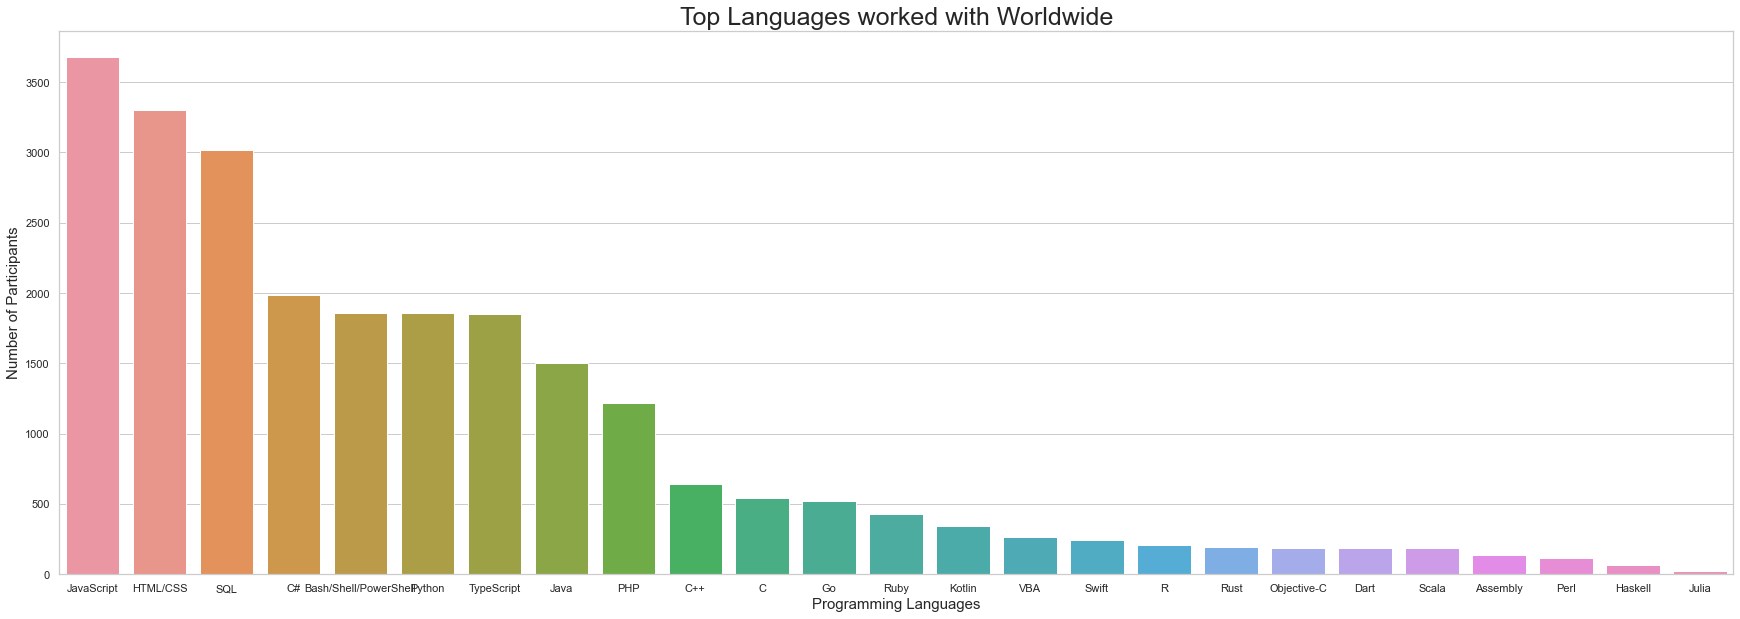

In [10]:
# Get counts of languages worked with
top_lang_2020 = lang_lists.stack().value_counts()

# Plot horizontal bar chart with the title 'Top Languages worked with Worldwide'
fig_dims = (30,10)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=top_lang_2020.index, y=top_lang_2020.values, ax=ax)
ax.set_title('Top Languages worked with Worldwide', fontsize=25)
ax.set_xlabel('Programming Languages', fontsize=15)
ax.set_ylabel('Number of Participants', fontsize=15)

In [11]:
country_val = new_df["Country"].value_counts()
country_val.head()

United States     1089
United Kingdom     324
Germany            266
India              229
Brazil             176
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

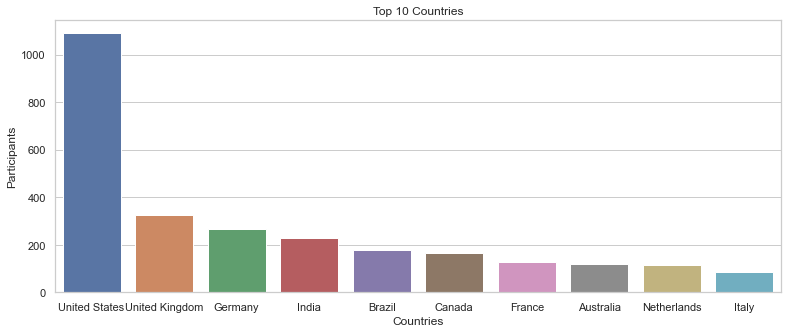

In [12]:
# Generate top 10 countries in bar chart
fig_dims = (13,5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=country_val[:10].index, y=country_val[:10].values).set(title='Top 10 Countries')
ax.set_ylabel('Participants')
ax.set_xlabel('Countries')

Text(0.5, 0, 'Countries')

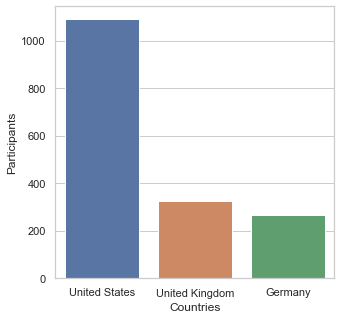

In [13]:
# generate  bar chart top 3 countries
fig_dims = (5,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=country_val[:3].index, y=country_val[:3].values)
ax.set_ylabel('Participants')
ax.set_xlabel('Countries')

- There are 183 countries who participated in this survey.
- The top 3 countries who participated in the survey is:
    1. United States
    2. United Kingdom
    3. Germany
- United States is the top country from which we have received major surveys amongst all other countries.

## Most program languages worked with in United States


In [14]:
top_lang_US = new_df["LanguageWorkedWith"][new_df["Country"] == "United States"].str.split(';', expand=True).stack().value_counts()
top_lang_US.head()

JavaScript               979
HTML/CSS                 881
SQL                      839
C#                       583
Bash/Shell/PowerShell    566
dtype: int64

## Most program languages worked with in Germany

In [15]:
top_lang_DE = new_df["LanguageWorkedWith"][new_df["Country"] == "Germany"].str.split(';', expand=True).stack().value_counts()
top_lang_DE.head()

JavaScript               228
HTML/CSS                 211
SQL                      166
Bash/Shell/PowerShell    133
TypeScript               126
dtype: int64

## Most program languages worked with in United Kingdom

In [16]:
top_lang_2020_GB = new_df["LanguageWorkedWith"][new_df["Country"] == "United Kingdom"].str.split(';', expand=True).stack().value_counts()
top_lang_2020_GB.head()

JavaScript               289
HTML/CSS                 259
SQL                      241
C#                       191
Bash/Shell/PowerShell    165
dtype: int64

# Data Visualization
Now we are going to generate some graphs for each the top 3 countries with top 10 most programming languages worked with.

Text(0.5, 0, 'Programming Languages')

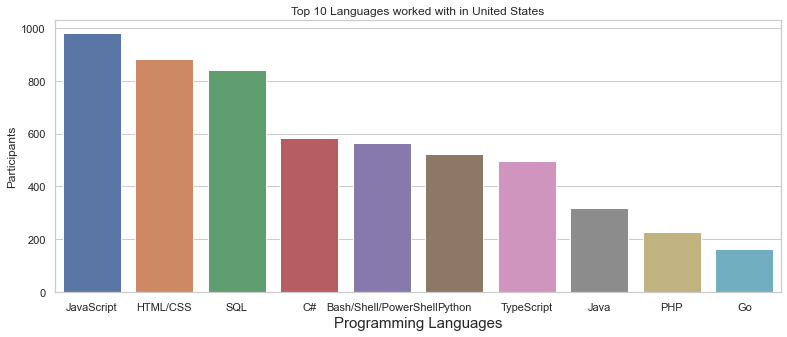

In [17]:
# Generate top 10 languages in bar chart for United States
fig_dims = (13,5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=top_lang_US[:10].index, y=top_lang_US[:10].values).set(title='Top 10 Languages worked with in United States')
ax.set_ylabel('Participants')
ax.set_xlabel('Programming Languages', fontsize=15)

Text(0.5, 0, 'Programming Languages')

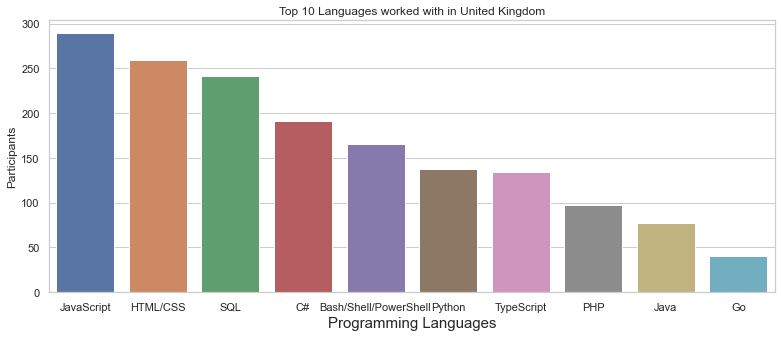

In [18]:
# Generate top 10 languages in bar chart for United Kingdom
fig_dims = (13,5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=top_lang_2020_GB[:10].index, y=top_lang_2020_GB[:10].values).set(title='Top 10 Languages worked with in United Kingdom')
ax.set_ylabel('Participants')
ax.set_xlabel('Programming Languages', fontsize=15)

Text(0.5, 0, 'Programming Languages')

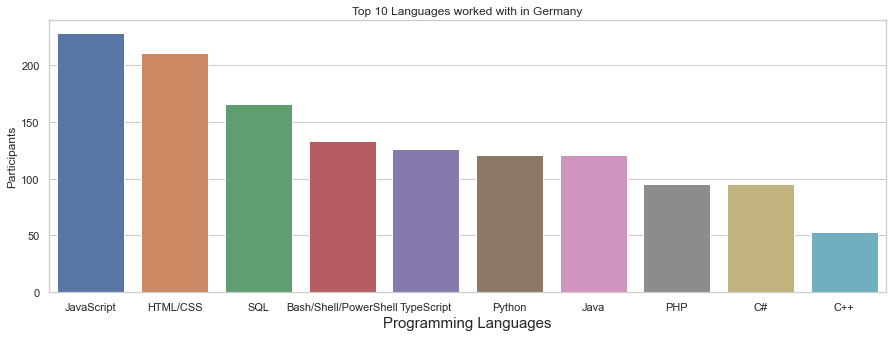

In [19]:
# Generate top 10 languages in bar chart for Germany
fig_dims = (15,5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=top_lang_DE[:10].index, y=top_lang_DE[:10].values).set(title='Top 10 Languages worked with in Germany')
ax.set_ylabel('Participants')
ax.set_xlabel('Programming Languages', fontsize=15)

#### 
As we can see from these 3 graphs above, United States, United Kingdom and Germany have the top 3 languages in common which are:
1. JavaScript
2. HTML/CSS
3. SQL

And the remaining languages from the top ten languages worked with in each country differ from each other.